In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from data_clean.loadData import getTickers

import yfinance as yf

In [36]:
DOWNLOAD_DATA = False

In [37]:
if DOWNLOAD_DATA:
    with open("../data/tickers.txt", "r") as f:
        tickers = [ticker.strip() for ticker in f.readlines()]

    df = yf.download(tickers, start='2005-01-01', end='2021-12-31')['Adj Close']
else:
    df = pd.read_csv('../data/all_ticker_data.csv', index_col=0, parse_dates=True)

In [42]:
# split datafram into years
# get min and max year
min_year = df.index.min().year
max_year = df.index.max().year

years = [df.loc[f'{year}-01-01':f'{year}-12-31'] for year in range(min_year, max_year + 1)]

len(years)

17

In [68]:
max_year

2021

In [95]:
def backtest(tickers=years[-1].columns, year=max_year, baseline=False):
    """
    Backtest a portfolio of tickers on a given year assuming an equal weight portfolio

    Parameters
    ----------
    tickers : list
        list of tickers to backtest
    year : int
        year to backtest

    Returns
    -------
    float
        portfolio percent return
    """
    if year < min_year or year > max_year:
        raise ValueError(f"year must be between {min_year} and {max_year}")

    # get the data for the year
    year_data = years[year - min_year]

    # get the data for the tickers
    year_data = year_data[tickers]

    # drop tickers that don't have data for the year
    year_data = year_data.dropna(axis=1)

    
    # year returns
    year_returns = year_data.pct_change()[1:]

    # fill NaN with 0
    year_returns = year_returns.fillna(0)

    # portfolio return
    portfolio_returns = year_returns.mean(axis=1)


    # returns up to any given date
    yearly_return =  (portfolio_returns + 1).cumprod()

    return yearly_return - 1

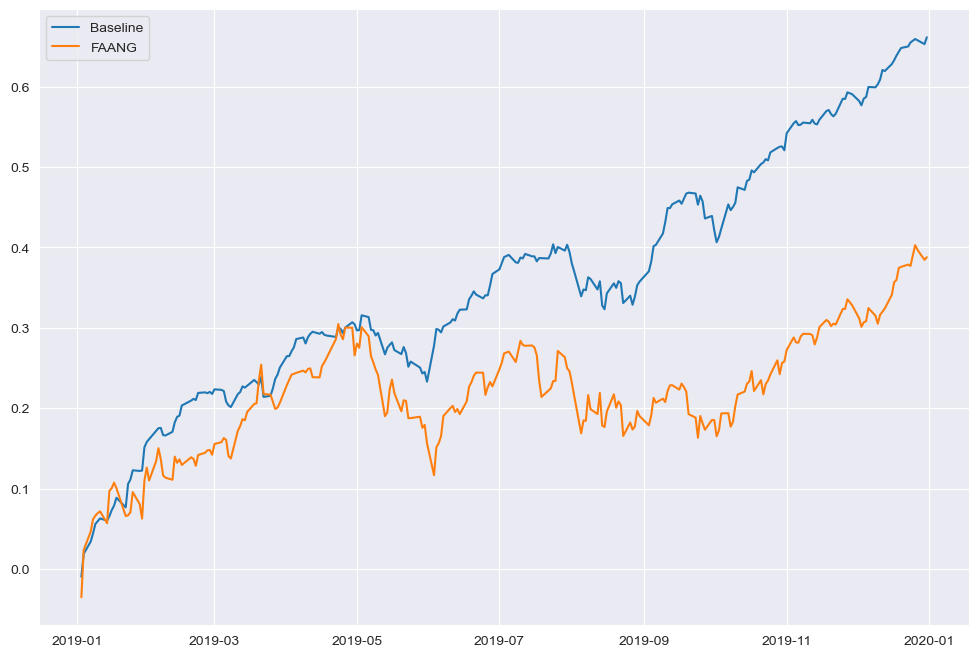

In [96]:
baseline = backtest(year=2019)
faang = backtest(tickers=['AAPL', 'AMZN', 'NFLX', 'GOOG'], year=2019)
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(baseline, label='Baseline')
plt.plot(faang, label='FAANG')
plt.legend()

In [15]:
# correlation matrix of stocks in 2005
correlation = sub_return.corr()